In [17]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [18]:
# Defining Organism class

class Organism:
    def __init__(self, gene_length):
        # Initialize instance variables
        self.gene = np.random.randint(2, size=gene_length)
        self.fitness = None

    def crossover(self, other):
        # Perform single-point crossover between two organisms
        point = random.randint(0, len(self.gene)-1)
        child1 = Organism(len(self.gene))
        child2 = Organism(len(self.gene))
        child1.gene = np.concatenate((self.gene[:point], other.gene[point:]))
        child2.gene = np.concatenate((other.gene[:point], self.gene[point:]))
        return child1, child2

    def mutate(self, mutation_rate):
        # Mutate an organism by randomly flipping bits in its gene sequence
        for i in range(len(self.gene)):
            if random.random() < mutation_rate:
                self.gene[i] = 1 - self.gene[i]
        self.fitness = None

In [19]:
def fitness_function(organism):
    # Calculate fitness score for an organism
    if organism.fitness is None:
        organism.fitness = sum(organism.gene)
    return organism.fitness

def natural_selection(population, fitness_function, mutation_rate, crossover_rate):
    # Calculate fitness scores for each organism in the population
    fitness_scores = [fitness_function(org) for org in population]

    # Select the fittest organisms for reproduction
    fittest_organism_indices = sorted(range(len(fitness_scores)), key=lambda i: fitness_scores[i], reverse=True)
    fittest_organisms = [population[i] for i in fittest_organism_indices[:int(len(population)*crossover_rate)]]

    # Create new offspring through crossover and mutation
    offspring = []
    for i in range(len(population) - len(fittest_organisms)):
        parent1, parent2 = random.sample(fittest_organisms, 2)
        child1, child2 = parent1.crossover(parent2)
        child1.mutate(mutation_rate)
        child2.mutate(mutation_rate)
        offspring.extend([child1, child2])

    # Combine the fittest organisms with the offspring to create the next generation
    next_generation = fittest_organisms + offspring

    return next_generation

Initial population:
{'gene': array([0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1]), 'fitness': None}
{'gene': array([1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1]), 'fitness': None}
{'gene': array([0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1

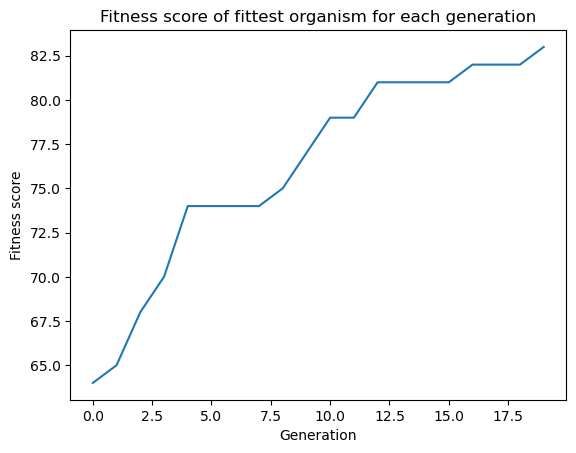

In [20]:
# This code performs a genetic algorithm to find the fittest organism within a population
# based on the fitness function.
# The fitness function is the sum of the gene values of the organism.
# The fitness score of an organism is the sum of its gene values.
# The fittest organism is the organism with the highest fitness score.
# The initial population is a list of 100 organisms, each with 20 genes.
# The fitness score of an organism is the sum of its gene values.
# The genetic algorithm is run for 100 generations.
# The mutation rate is 10%.
# The crossover rate is 50%.
# The gene sequence of the fittest organism is plotted after each generation.

# Set up initial population
population_size = 100
gene_length = 100
population = [Organism(gene_length) for i in range(population_size)]
print("Initial population:")
for organism in population:
    print(organism.__dict__)
print()

# Set up genetic algorithm parameters
num_generations = 20
mutation_rate = 0.1
crossover_rate = 0.5

# Set up plot
fig, ax = plt.subplots()

fitness_scores = []
# Iterate through generations
for generation in range(num_generations):
    # Perform natural selection, crossover, and mutation
    population = natural_selection(population, fitness_function, mutation_rate, crossover_rate)

    # Calculate fitness score for the fittest organism in this generation
    fittest_organism = max(population, key=fitness_function)
    fitness_scores.append(fitness_function(fittest_organism))
    # Print the fittest organism and its fitness score for this generation
    print("Generation:", generation+1)
    print("Fittest organism:", fittest_organism.__dict__)
    print("Fitness score:", fitness_function(fittest_organism))
    print()


def plot_fitness(fitness_scores):
    """
    Plots the fitness score of the fittest organism for each generation.
    """
    plt.plot(range(len(fitness_scores)), fitness_scores)
    plt.xlabel("Generation")
    plt.ylabel("Fitness score")
    plt.title("Fitness score of fittest organism for each generation")
    plt.show()
    
plot = plot_fitness(fitness_scores)